In [113]:
import os
import os
import numpy as np
import pandas as pd
from PIL import Image
import io
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam



In [114]:


def extract_fruit_info(base_path, fruits, target_size=(100, 100), max_images_per_category=50):  # Tamaño de la imagen a guardar
    # List to hold the data
    data = []

    # Supported image formats
    supported_formats = ('.jpg', '.jpeg', '.png')

def extract_fruit_info(base_path, fruits, target_size=(100, 100), max_images_per_category=110):
    # List to hold the data
    data = []

    # Supported image formats
    supported_formats = ('.jpg', '.jpeg', '.png')

    # Loop through each selected fruit
    for fruit in fruits:
        for status in ['Healthy', 'Rotten']:
            category = f"{fruit}__{status}"
            category_path = os.path.join(base_path, category)
            
            # Check if the current path is a directory
            if os.path.isdir(category_path):
                print(f"Processing directory: {category_path}")
                
                # Determine if the fruit is rotten based on the directory name
                is_rotten = 'Rotten' in category
                image_count = 0
                
                # Loop through each file in the category directory
                for filename in os.listdir(category_path):
                    # Check if the file is an image based on the extension and if we have not exceeded the max images limit
                    if filename.lower().endswith(supported_formats) and (max_images_per_category is None or image_count < max_images_per_category):
                        file_path = os.path.join(category_path, filename)
                        
                        # Open the image to get its size and content
                        with Image.open(file_path) as image:
                            image = image.resize(target_size)  # Resize image to target size
                            image_array = np.array(image)
                        
                        # Append the data to the list including the new 'category' information
                        data.append([
                            filename, 
                            file_path, 
                            f"{image.width}x{image.height}", 
                            is_rotten,
                            fruit,
                            category,  # New column for combined category info
                            image_array
                        ])
                        image_count += 1
            else:
                print(f"Directory does not exist: {category_path}")

    # Convert the list to a NumPy array
    data_array = np.array(data, dtype=object)
    return data_array


# Example usage
base_path = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project\Datos\Fruit And Vegetable Diseases Dataset"
selected_fruits = ['Apple', 'Banana', 'Bellpepper']  # Select 3 fruits

TAMANO_IMG = 100 #tamano de la imagen que se necesita

data_array = extract_fruit_info(base_path, selected_fruits,(TAMANO_IMG,TAMANO_IMG),60)

#Check if data_array is empty
if data_array.size == 0:
    print("No data found. Please check the directory paths and image files.")
else:
    # Convert the NumPy array to a DataFrame
    df = pd.DataFrame(data_array, columns=['file_name', 'image_path', 'image_size', 'is_rotten', 'fruit', 'category', 'image'])


    # Display the DataFrame
    print(df.head())

    # Example to show the shape of an image
    sample_image = df.loc[0, 'image']
    print(f"Sample image shape: {sample_image.shape}")




Processing directory: C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project\Datos\Fruit And Vegetable Diseases Dataset\Apple__Healthy
Processing directory: C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project\Datos\Fruit And Vegetable Diseases Dataset\Apple__Rotten
Processing directory: C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project\Datos\Fruit And Vegetable Diseases Dataset\Banana__Healthy
Processing directory: C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project\Datos\Fruit And Vegetable Diseases Dataset\Banana__Rotten
Processing directory: C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project\Datos\Fruit And Vegetable Diseases Dataset\Bellpepper__Healthy
Processing directory: C:\Users\ninic\OneDrive - Lambton Coll

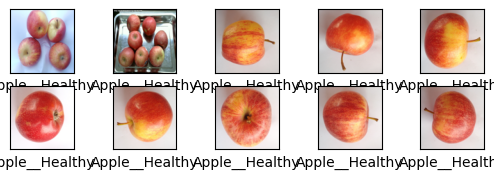

In [115]:
for i in range(min(10, len(df))):  # Ensure we don't exceed the number of available images
   image_array = df.loc[i, 'image']
   plt.subplot(5, 5, i + 1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(image_array, cmap=plt.cm.binary)
   plt.xlabel(df.loc[i, 'category'])

plt.show()


In [116]:

# Lista para almacenar los datos de entrenamiento
datos_entrenamiento = []

# Recorrer el DataFrame y procesar cada imagen
for index, row in df.iterrows():
    imagen = row['image']
    etiqueta = row['is_rotten']
    
    # Redimensionar la imagen
    imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    
    # Asegurarse de que la imagen tenga tres canales (RGB)
    if len(imagen.shape) == 2:  # Si la imagen es en escala de grises
        imagen = cv2.cvtColor(imagen, cv2.COLOR_GRAY2RGB)
    
    # Añadir la imagen procesada y la etiqueta a la lista de datos de entrenamiento
    datos_entrenamiento.append([imagen, etiqueta])

# Convertir la lista de datos de entrenamiento a un array de numpy
datos_entrenamiento = np.array(datos_entrenamiento, dtype=object)

In [117]:
datos_entrenamiento

array([[array([[[213, 236, 255],
                [215, 236, 255],
                [215, 238, 255],
                ...,
                [209, 229, 254],
                [206, 227, 255],
                [202, 225, 255]],

               [[213, 235, 255],
                [214, 236, 255],
                [215, 238, 255],
                ...,
                [208, 228, 254],
                [205, 226, 255],
                [201, 224, 255]],

               [[214, 235, 255],
                [215, 236, 255],
                [215, 237, 255],
                ...,
                [205, 226, 255],
                [202, 224, 254],
                [200, 223, 255]],

               ...,

               [[218, 246, 255],
                [218, 245, 255],
                [218, 243, 255],
                ...,
                [170, 203, 248],
                [170, 203, 248],
                [170, 203, 248]],

               [[218, 244, 255],
                [217, 243, 255],
                [217, 241, 25

In [118]:
X = [] #imagenes de entrada (pixeles)
y = []


for imagen,etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

y

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fal

In [119]:
y = np.array(y).astype(float) #pasar de lista a arrelo para que el modelo lo corra
X = np.array(X).astype(float) / 255

print(X.shape)  # Verificar la nueva forma del array el arreglo tiene a imagenes, con b*c pixeles con 3 canales de color por ser a clor 

(360, 100, 100, 3)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['category'], random_state=42)
print(y_train.shape)  # Esperado: (n_samples,)
print(y_train[:5])    # Ver los primeros 5 valores de etiquetas para verificar



(288,)
[0. 0. 0. 1. 1.]


In [128]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(TAMANO_IMG,TAMANO_IMG,3)), #3 = a color
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Crear un directorio de logs único para cada corrida con la fecha y hora actual
log_dir = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Project" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Entrenamiento del modelo (aprentar ctrl shift p)
model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          batch_size=50,  # Añadiendo el tamaño del lote aquí
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5215 - loss: 2.0001 - val_accuracy: 0.7639 - val_loss: 1.7154
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7349 - loss: 1.6558 - val_accuracy: 0.8194 - val_loss: 0.7691
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7961 - loss: 0.6091 - val_accuracy: 0.8611 - val_loss: 0.7542
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7923 - loss: 0.5543 - val_accuracy: 0.8056 - val_loss: 0.6189
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8524 - loss: 0.3751 - val_accuracy: 0.8194 - val_loss: 0.5609
